In [1]:
#Rumus Slovin untuk Play Store
# Diketahui
N = 117000  # Jumlah populasi (total review)
e = 0.05  # Margin of error (5%)

# Menghitung ukuran sampel dengan rumus Slovin
n = N / (1 + N * e**2)
n

398.63713798977847

In [2]:
!pip install google-play-scraper pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


In [3]:
from google_play_scraper import reviews, Sort
import pandas as pd

app_package = "in.startv.hotstar.dplus"

#Scraping review
reviews_data, _ = reviews(
    app_package,
    count=399,
    lang="id",
    country="id",
    sort=Sort.NEWEST
)

df_playstore = pd.DataFrame(reviews_data)

df_playstore.to_csv("android-reviews.csv", index=False)
print("Scraping selesai! Hasil telah disimpan di android-reviews.csv")

Scraping selesai! Hasil telah disimpan di android-reviews.csv


In [4]:
df_playstore.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,66ddf622-3bd3-48fc-b4e7-876c2d892160,Boy's,https://play-lh.googleusercontent.com/a/ACg8oc...,apk tolol nyari vidio g bisa nonton vidio laya...,1,0,None,2025-03-02 05:12:02,None,NaT,None
1,69a745b6-f6c3-47b5-befc-1e3b07687fe4,Birrul Alim,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya jelek pas login udh pasang nomor t...,1,0,25.01.20.9,2025-03-02 05:00:18,"Hai, mohon maaf atas ketidaknyamannya. Mohon k...",2025-03-02 09:12:49,25.01.20.9
2,8087ff6b-ff63-4917-b456-f1cf02a68fca,Elsye Cinthia,https://play-lh.googleusercontent.com/a/ACg8oc...,"Ini aplikasi apaan sih, udh hapus download mas...",1,0,25.01.20.9,2025-03-02 02:11:54,Hai! Mohon maaf atas ketidaknyamannya. Mohon k...,2025-03-02 07:32:29,25.01.20.9
3,edbc7f80-5bae-4e91-aa61-3468135cada2,BSK. HASAN ST,https://play-lh.googleusercontent.com/a/ACg8oc...,Agak kurang menarik,4,0,None,2025-03-02 01:53:06,None,NaT,None
4,4500de51-7655-4668-88c6-a096d22d6ca3,Hshbsbb Hshbsbbbsbsjj,https://play-lh.googleusercontent.com/a/ACg8oc...,gw kira gratis tapi berbayar mending unistal,1,0,25.01.20.9,2025-03-01 17:14:15,None,NaT,25.01.20.9


In [5]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=83c2c7fe29cbf957903f322a42d66e845b1c50b0a7726162abee0d914ceb9e63
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [6]:
from googletrans import Translator

translator = Translator()

input_file = 'android-reviews.csv'
data = pd.read_csv(input_file)

df = pd.DataFrame(data)
if 'content' not in df.columns:
  raise KeyError("Kolom 'content' tidak ditemukan.")

#Translate kolom content
def translate_text(text):
  try:
    translated = translator.translate(text, src='id', dest='en')
    return translated.text
  except Exception as e:
    print(f"Terjadi kesalahan saat menerjemahkan teks: {e}")

df['content_translated'] = df['content'].apply(translate_text)

df.to_csv('android-reviews-translated.csv', index=False)
print("Terjemahan selesai! Hasil telah disimpan di android-reviews-translated.csv")

Terjemahan selesai! Hasil telah disimpan di android-reviews-translated.csv


In [7]:
input_file = 'android-reviews-translated.csv'
data = pd.read_csv(input_file)

def case_folding(text):
  try:
    return text.lower()
  except AttributeError:
    return text

df['content_case_folding'] = df['content_translated'].apply(case_folding)

df.to_csv('android-reviews-case-folding.csv', index=False)
print("Case folding selesai! Hasil telah disimpan di android-reviews-case-folding.csv")

Case folding selesai! Hasil telah disimpan di android-reviews-case-folding.csv


In [8]:
input_file = 'android-reviews-case-folding.csv'
data = pd.read_csv(input_file)

def tokenize_text(text):
  try:
    return text.split()
  except AttributeError:
    return[]

df['content_tokenized'] = df['content_case_folding'].apply(tokenize_text)

df.to_csv('android-reviews-tokenized.csv', index=False)
print("Tokenisasi selesai! Hasil telah disimpan di android-reviews-tokenized.csv")

Tokenisasi selesai! Hasil telah disimpan di android-reviews-tokenized.csv


In [9]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))

  if isinstance(text, str):
    text = text.strip('[]')
    words = re.findall(r'\'([^\']+)\'|"([^"]+)"', text)
    words = [w[0] or w[1] for w in words if w[0] or w[1]]
  else:
    words = text

  cleaned_text = []
  for word in words:
    word = word.strip().strip("'").strip('"').strip()
    if word and word.lower() not in stop_words:
      cleaned_text.append(word)
  return cleaned_text

df = pd.read_csv('android-reviews-tokenized.csv')

df['stopwords_removed'] = df['content_tokenized'].apply(remove_stopwords)

df.to_csv('android-reviews-stopword.csv', index=False)
print("Stopword removal selesai! Hasil telah disimpan di android-reviews-stopword.csv")

Stopword removal selesai! Hasil telah disimpan di android-reviews-stopword.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import ast

input_file = 'android-reviews-stopword.csv'
data = pd.read_csv(input_file)

def to_lowercase(content):
  try:
    # Use ast.literal_eval to safely parse the string representation of a list
    words = ast.literal_eval(content)
    return str([word.lower() for word in words])
  except (AttributeError, SyntaxError, ValueError): # Handling potential errors during parsing
    return content

df['final'] = df['stopwords_removed'].apply(to_lowercase)

df.to_csv('android-reviews-final.csv', index=False)
print("Lowercasing selesai! Hasil telah disimpan di android-reviews-final.csv")

Lowercasing selesai! Hasil telah disimpan di android-reviews-final.csv


In [12]:
from transformers import pipeline

input_file = 'android-reviews-stopword.csv'
df = pd.read_csv(input_file)

sentiment_analyzer = pipeline('sentiment-analysis')

def predict_sentiment(text):
  result = sentiment_analyzer(text)[0]
  return 1 if result['label'] == 'POSITIVE' else 0

df['sentiment'] = df['stopwords_removed'].apply(predict_sentiment)

df.to_csv('android-reviews-sentiment.csv', index=False)
print("Sentiment analysis selesai! Hasil telah disimpan di android-reviews-sentiment.csv")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment analysis selesai! Hasil telah disimpan di android-reviews-sentiment.csv


In [14]:
input_file = 'android-reviews-sentiment.csv'
df = pd.read_csv(input_file)

def labeling(rating):
  if rating in [1,2]:
    return 0
  if rating in [4,5]:
    return 1
  else:
    return None #Handle Neutral scores like 3

df['score_label'] = df['score'].apply(labeling)

df.to_csv('android-reviews-labeled.csv', index=False)
print("Labeling selesai! Hasil telah disimpan di android-reviews-labeled.csv")

Labeling selesai! Hasil telah disimpan di android-reviews-labeled.csv


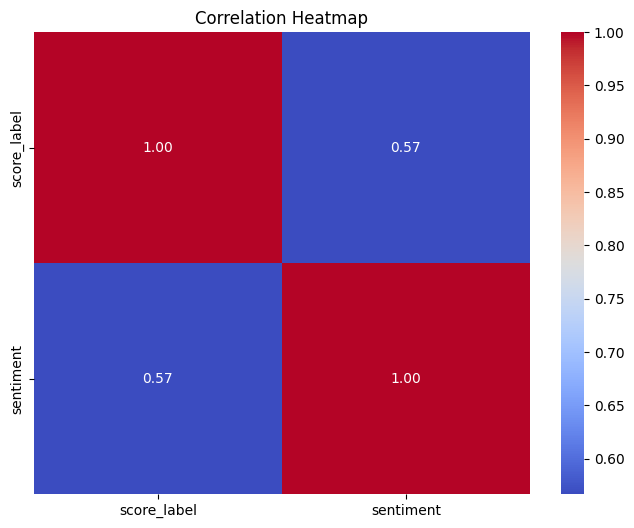

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

input_file = 'android-reviews-labeled.csv'
df = pd.read_csv(input_file)

# Count the occurrences of each label
label_counts = df['score_label'].value_counts()

correlation_matrix = df[['score_label', 'sentiment']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

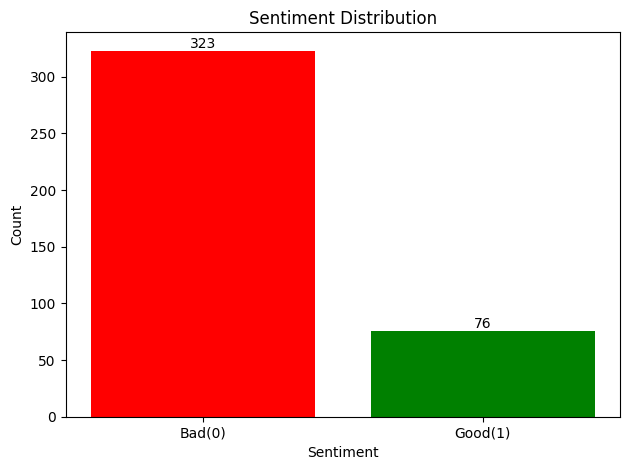

In [18]:
input_file = 'android-reviews-sentiment.csv'
df = pd.read_csv(input_file)

sentiment_counts = df['sentiment'].value_counts().sort_index()

sentiment_labels = ['Bad(0)', 'Good(1)']

plt.bar(sentiment_labels, sentiment_counts, color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i, count in enumerate(sentiment_counts):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

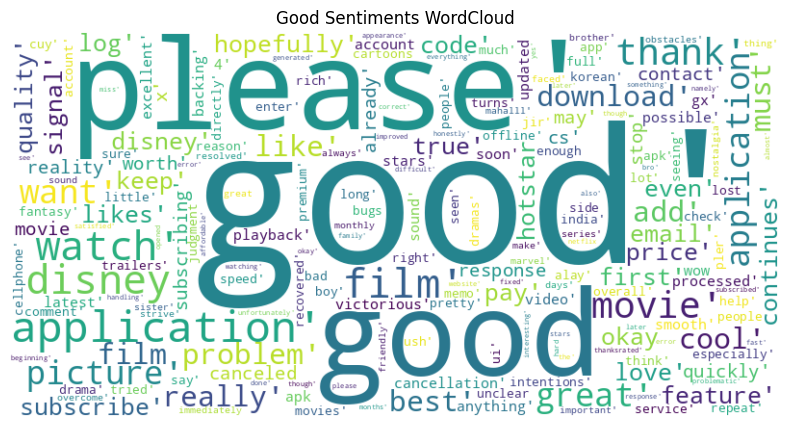

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_file = 'android-reviews-sentiment.csv'
df = pd.read_csv(input_file)

good_sentiments = df[df['sentiment'] == 1]['stopwords_removed']

text = ' '.join(good_sentiments.dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Good Sentiments WordCloud')
plt.show()

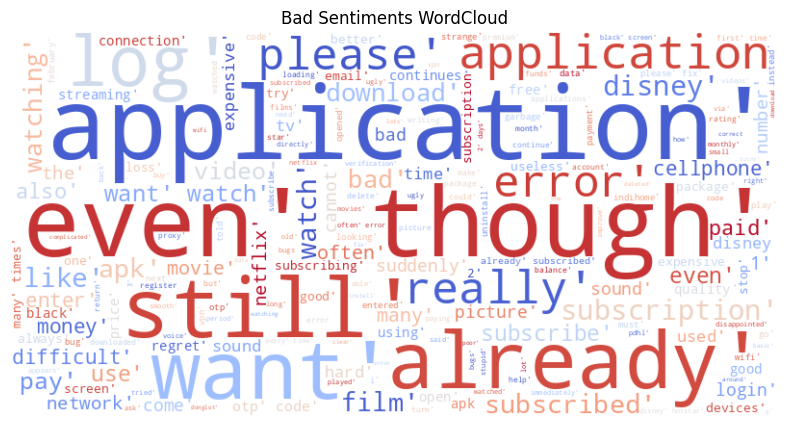

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_file = 'android-reviews-sentiment.csv'
df = pd.read_csv(input_file)

bad_sentiments = df[df['sentiment'] == 0]['stopwords_removed']

text = ' '.join(bad_sentiments.dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bad Sentiments WordCloud')
plt.show()

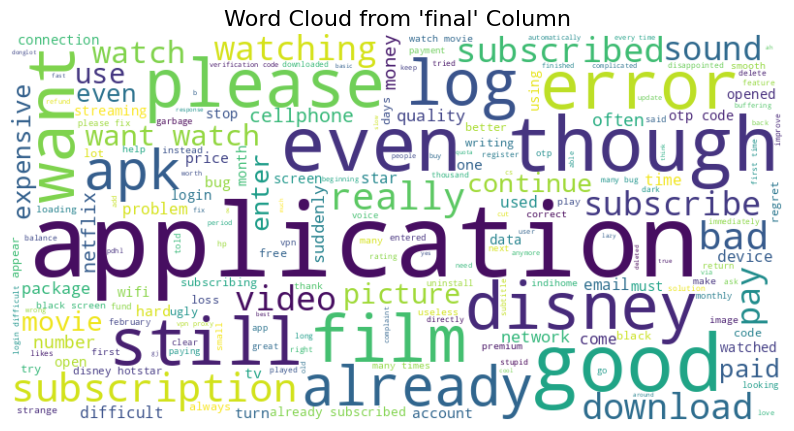

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all rows of 'final_content' into a single string
# Convert lists back to strings and concatenate them
all_text = ' '.join([' '.join(eval(row)) for row in df['stopwords_removed'] if isinstance(row, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from 'final' Column", fontsize=16)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'application'),
  Text(1, 0, 'good'),
  Text(2, 0, 'even though'),
  Text(3, 0, 'please'),
  Text(4, 0, 'error'),
  Text(5, 0, 'want'),
  Text(6, 0, 'still'),
  Text(7, 0, 'film'),
  Text(8, 0, 'disney'),
  Text(9, 0, 'log')])

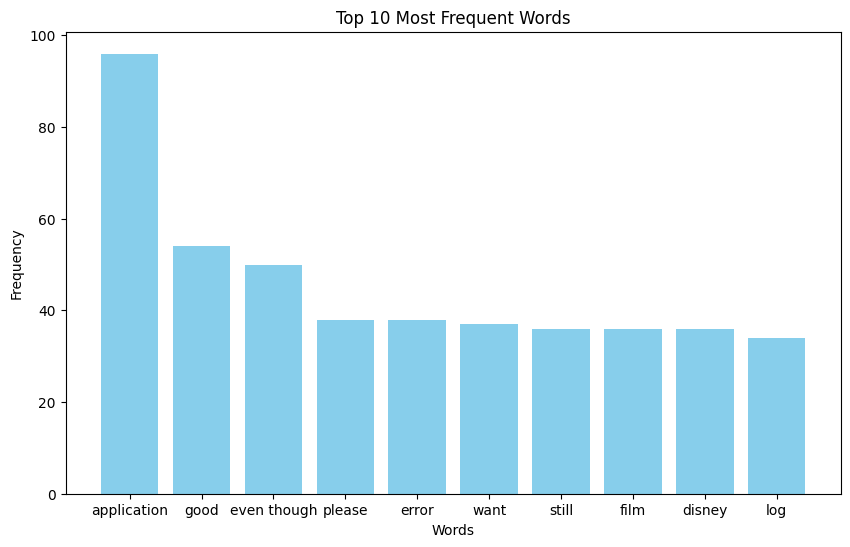

In [88]:
from collections import Counter
import numpy as np

all_text = ' '.join([' '.join(eval(row)) for row in df['stopwords_removed'] if isinstance(row,str)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

freq_word = wordcloud.process_text(all_text)

word_counts = Counter(freq_word)

top_words = word_counts.most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=0)

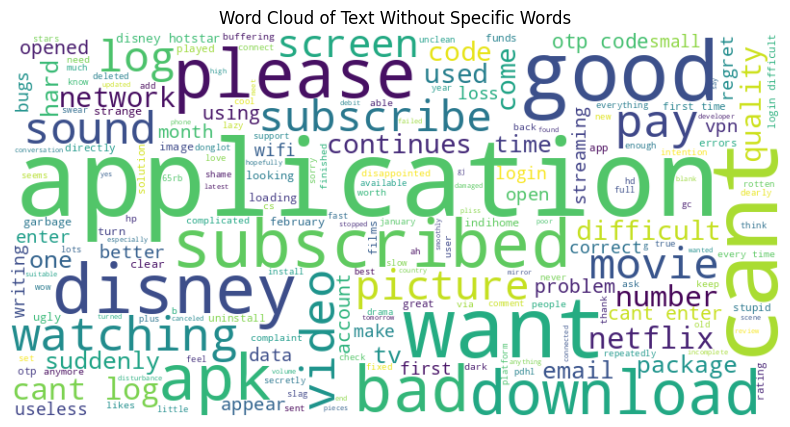

In [90]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Load the CSV file (replace with your actual file path)
data_file = 'android-reviews-labeled.csv'
df = pd.read_csv(data_file)

# List of words to exclude (case insensitive)
custom_stopwords = [
    "devices", "connection", "use", "downloaded", "installed", "verification",
    "entered", "register", "delete", "signal", "proxy", "restart", "subscription",
    "update", "said", "help", "look", "tried", "times", "reason", "turns", "many",
    "always", "continue", "stop", "right", "instead", "next", "several", "beginning",
    "lot", "around", "feature", "basic", "must", "payment", "balance", "auto",
    "period", "refund", "premium", "price", "thousand", "paying", "return", "money",
    "cost", "buy", "fund", "film", "watched", "play", "movies", "subtitles", "soundtrack",
    "smooth", "visual", "subscribing", "fund", "paid", "bug", "quota", "cellphone",
    "cut", "star", "week", "long", "hot", "improve", "service", "automatically",
    "immediately", "cancel", "internet", "list", "fix", "send", "added", "go",
    "okay", "try", "told", "black", "offline", "watch", "expensive", "cheap",
    "free", "monthly", "days", "error", "voice", "often", "really", "even",
    "though", "still", "already"
]
# Combine all the text from the 'text_without_stopwords' column
text = ' '.join(df['stopwords_removed'].dropna())

# Clean the text by removing unwanted characters like punctuation
text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation using regex

# Split the text into words and filter out the excluded words (case insensitive)
words = [word.lower() for word in text.split() if word.lower() not in custom_stopwords]

# Generate Word Cloud from filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title("Word Cloud of Text Without Specific Words")
plt.show()

In [103]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load data
df = pd.read_csv('android-reviews-final.csv')

# Convert text list safely into an actual list
def safe_eval(row):
    try:
        return ast.literal_eval(row)
    except (ValueError, SyntaxError):
        return []

df['final'] = df['final'].apply(safe_eval)

# Join words into full sentences
documents = [' '.join(words) for words in df['final'] if isinstance(words, list)]

# Custom stop words (tambahkan kata umum yang tidak perlu)
custom_stopwords = ['watch', 'disney', 'application', 'apk', 'use', 'really',
                    'want', 'download', 'like', 'can', 'still', 'even', 'already', 'please', 'though', 'also', 'first', 'one', 'go', 'thank', 'make', 'it'
                    , 'code', 'continues', 'subscription', 'subscribe', 'subscribing', 'subscribed', 'good', 'log', 'film', 'error', 'hotstar', 'movie', 'video', 'watching']

# Vectorizer with LDA-friendly settings
vectorizer = CountVectorizer(max_df=0.85, min_df=3, stop_words=custom_stopwords)
X = vectorizer.fit_transform(documents)

# LDA Model (ubah jumlah topik jika diperlukan)
lda_model = LatentDirichletAllocation(n_components=4, random_state=42)
lda_model.fit(X)

# Print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]  # Get top 10 words
    print(f"Topic {topic_idx + 1}: {' '.join(feature_names[top_words_idx])}")

Topic 1: quality price bugs expensive devices continue many netflix films likes
Topic 2: bad difficult login often in hard must small account play
Topic 3: picture pay money email paid sound vpn wifi data using
Topic 4: enter black screen otp cellphone package time netflix sound pay


In [104]:
# Lihat probabilitas dokumen untuk tiap topik
doc_topic_dist = lda_model.transform(X)

# Cek topik dominan untuk tiap dokumen
dominant_topics = doc_topic_dist.argmax(axis=1)

# Hitung distribusi topik
import numpy as np
topic_counts = np.bincount(dominant_topics)

# Print jumlah dokumen dalam tiap topik
for i, count in enumerate(topic_counts):
    print(f"Topic {i+1}: {count} documents")


Topic 1: 130 documents
Topic 2: 73 documents
Topic 3: 97 documents
Topic 4: 99 documents


# 🔍Simpulan hasil
* Topic 1: **Kualitas & harga mahal** (*quality, price, bugs, expensive, devices, netflix*). Pengguna mengeluhkan harga mahal dan kualitas buruk dibanding kompetitor.
* Topic 2: **Masalah login & sulit akses** (*bad, difficult, login, account, play*). Pengguna sulit untuk login atau memainkan film.
* Topic 3: **Masalah pembayaran & koneksi internet** (*pay, money, email, vpn, wifi*). Ada masalah terkait pembayaran, serta isu vpn dan wifi.
* Topic 4: **Layar hitam & OTP** (*enter, black screen, otp, cellphone, netflix*). Pengguna mengalami layar hitam saat masuk, mungkin terkait OTP atau akses via ponsel.

# 📌 Insight
* Topic 1: harga tidak sesuai dengan kualitas.
* Topic 2: banyak pengguna mengalami kesulitan masuk.
* Topic 3: Ada masalah pembayaran atau tagihan yang tidak sesuai serta ada kendala saat menggunakan data, vpn atau internet.
* Topic 4: Pengguna mungkin tidak bisa masuk karena OTP atau layar hitam, dan bisa jadi ada masalah spesifik di aplikasi mobile.